# Principle Component Analysis (PCA) for image processing

This notebook uses the MNIST database (Modified National Institute of Standards and Technology database), a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

MNIST data from Yann LeCun's website is our example data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

# Get MNIST data from Yann LeCun --> http://yann.lecun.com/exdb/mnist/

#Convert to ndarray
mnist = idx2numpy.convert_from_file('train.idx')
labels = idx2numpy.convert_from_file('train-labels.idx')

In [2]:
mnist.shape

(60000, 28, 28)

This is an image of the number 0


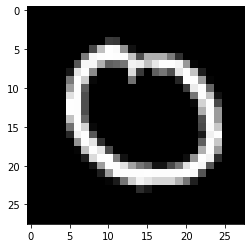

In [3]:
plt.imshow(mnist[108,:,:], interpolation = "none", cmap = "gray")
print("This is an image of the number", labels[108])

This is an image of the number 1


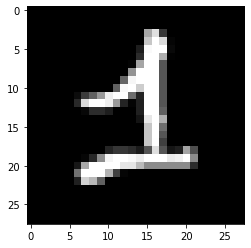

In [4]:
plt.imshow(mnist[24,:,:], interpolation = "none", cmap = "gray")
print("This is an image of the number", labels[24])

This is an image of the number 7


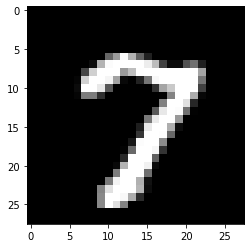

In [5]:
plt.imshow(mnist[819,:,:], interpolation = "none", cmap = "gray")
print("This is an image of the number", labels[819])

Now let's try to implement our own PCA and then check if it agrees with the pca from SciKit-Learn.

In [6]:
# need to standardize the data by subtracting the mean 
# helps to normalize the data by scaling it with the standard deviation)

mnist_mean = np.mean(mnist, 0)
mnist_std = np.std(mnist, 0)

mnist_standardized = np.empty(mnist.shape)

for i in range(mnist.shape[0]):
    mnist_standardized[i,:,:] = (mnist[i,:,:] - mnist_mean)/(1e-10 + mnist_std)


overall average of all images


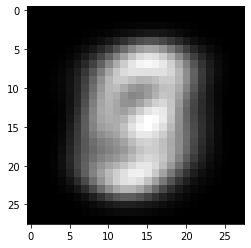

In [7]:
plt.imshow(mnist_mean, interpolation = "none", cmap = "gray")
print("overall average of all images")

In [8]:
# reshape data into a vector
mnist_new = np.empty([mnist.shape[0], mnist.shape[1]*mnist.shape[2]])

for i in range(mnist.shape[0]):
    mnist_new[i,:]= np.reshape(mnist_standardized[i,:,:], mnist.shape[1]*mnist.shape[2])

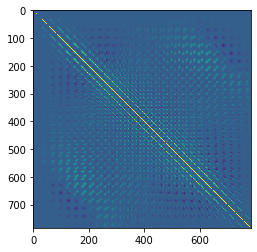

In [9]:
# compute covariance matrix
c = np.matmul(mnist_new.T , mnist_new)
plt.imshow(c, interpolation = "none", cmap = "viridis")
plt.show()

Now we can project onto a lower-dimensional space

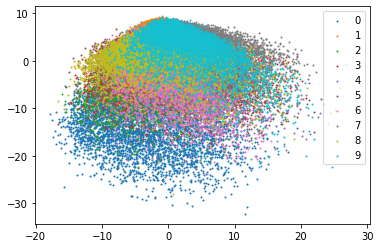

In [10]:
# use eigenvalue decomposition from numpy
values, vectors = np.linalg.eigh(c)

mnist_projection = np.matmul(mnist_new, vectors)

lr = mnist.shape[1]*mnist.shape[2]

for i in range(10):
    plt.scatter(mnist_projection[labels == i, lr-2], mnist_projection[labels == i, lr-1], s = 1, label = i)

plt.legend()
plt.show()

In [11]:
mnist.shape[1]

28

In [12]:
lr

784

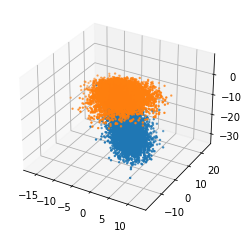

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mnist_projection[labels==0,lr-3],mnist_projection[labels==0,lr-2], mnist_projection[labels==0,lr-1],s=2)
ax.scatter(mnist_projection[labels==5,lr-3],mnist_projection[labels==5,lr-2], mnist_projection[labels==5,lr-1],s=2)
plt.show()

# Stochastic Neighborhood Embedding (SNE)

Method presented in:
https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

In [14]:
from sklearn.manifold import TSNE

In [15]:
Nmax = 10000
mnist_sne = TSNE(n_components=2, perplexity=10.0, learning_rate='auto', init='pca').fit_transform(mnist_new[0:Nmax,:])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


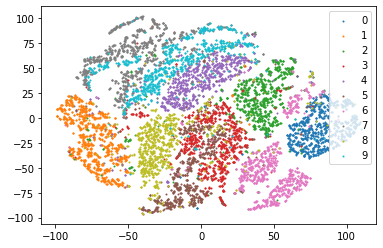

In [16]:
for i in range(10):
    plt.scatter(mnist_sne[labels[0:Nmax]==i,0], mnist_sne[labels[0:Nmax]==i,1],s=1,label=i)
plt.legend()
plt.show()

Here we can see there is a much clearer separation in labels compared to the eigenvalue decomposition method above